In [ ]:
import pandas as pd
import numpy as np

train = pd.read_csv('/content/drive/MyDrive/dacon/sunlight/train.csv')
submission = pd.read_csv('/content/drive/MyDrive/dacon/sunlight/sample_submission.csv')
submission.set_index('id',inplace=True)


In [ ]:
def transform(dataset, target, start_index, end_index, history_size,
                      target_size, step):
    data = []
    labels = []
    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size
    for i in range(start_index, end_index, 48):
        indices = range(i-history_size, i, step)
        data.append(np.ravel(dataset[indices].T))
        labels.append(target[i:i+target_size])
    data = np.array(data)
    labels = np.array(labels)
    return data, labels

# x_col =['DHI','DNI','WS','RH','T','TARGET']
x_col =['TARGET']
y_col = ['TARGET']

dataset = train.loc[:,x_col].values
label = np.ravel(train.loc[:,y_col].values)

past_history = 48 * 2
future_target = 48 * 2

### transform train
train_data, train_label = transform(dataset, label, 0,None, past_history,future_target, 1)
### transform test
test = []
for i in range(81):
    data = []
    tmp = pd.read_csv(f'/content/drive/MyDrive/dacon/sunlight/test/{i}.csv')
    tmp = tmp.loc[:, x_col].values
    tmp = tmp[-past_history:,:]
    data.append(np.ravel(tmp.T))
    data = np.array(data)
    test.append(data)
test = np.concatenate(test, axis=0)

In [ ]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

n_folds = 5
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_data)
    rmse= np.sqrt(-cross_val_score(model, train_data, train_label, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, max_iter=3000, tol=0.001, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, max_iter=4000, tol=0.001, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.03,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='quantile')
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.03, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.03, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
RF = RandomForestRegressor(n_estimators=2000, max_features='sqrt', min_samples_leaf=15, min_samples_split=10,
                                    verbose=True,
                                    n_jobs=-1)

In [ ]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coo


Lasso score: 11.9194 (2.3310)



In [ ]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coo

ElasticNet score: 11.9146 (2.3274)



In [ ]:
score = rmsle_cv(RF)
print("RF score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:   12.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 2000 out of 2000 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:   11.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 

LGBM score: 11.1303 (1.9826)



[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 2000 out of 2000 | elapsed:    0.6s finished


In [ ]:
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(train_data, train_label, test_size=0.5, random_state=1)
kf = KFold(n_splits=5, random_state=random_state)
from sklearn.ensemble import ExtraTreesRegressor, AdaBoostRegressor


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
from hyperopt import tpe, hp, anneal, Trials, fmin
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import ExtraTreesRegressor, AdaBoostRegressor
def gb_mse_cv(params, random_state=random_state, cv=kf, X=X_train, y=y_train):
    # the function gets a set of variable parameters in "param"
    params = {'n_estimators': int(params['n_estimators']), 
              'max_depth': int(params['max_depth']),
             'max_features': int(params['max_features']),
             'min_samples_leaf': int(params['min_samples_leaf']),
             'min_samples_split': int(params['min_samples_split'])
              }
    model = ExtraTreesRegressor(bootstrap=True, random_state=random_state, **params)
    score = np.sqrt(-cross_val_score(model, X, y, cv=cv, scoring="neg_mean_squared_error", n_jobs=-1).mean())
    return score

# possible values of parameters
space={'n_estimators': hp.quniform('n_estimators', 100, 2000, 1),
       'max_depth' : hp.quniform('max_depth', 2, 20, 1),
       'max_features' : hp.quniform('max_features', 2, 10, 1),
       'min_samples_leaf' : hp.quniform('min_samples_leaf', 1, 20, 1),
       'min_samples_split' : hp.quniform('min_samples_split', 1, 20, 1)
      }

# trials will contain logging information
trials = Trials()

best=fmin(fn=gb_mse_cv, # function to optimize
          space=space, 
          algo=anneal.suggest, # optimization algorithm, hyperotp will select its parameters automatically
          max_evals=50, # maximum number of iterations
          trials=trials, # logging
          rstate=np.random.RandomState(random_state) # fixing random state for the reproducibility
         )

# computing the score on the test set
model = ExtraTreesRegressor(random_state=random_state, n_estimators=int(best['n_estimators']),
                      max_depth=int(best['max_depth']),max_features=int(best['max_features']),
                      min_samples_leaf=int(best['min_samples_leaf']),min_samples_split=int(best['min_samples_split']))
model.fit(X_train,y_train)
sa_test_score=np.sqrt(mean_squared_error(X_test, model.predict(y_test)))
print("Best MSE {:.3f} params {}".format( gb_mse_cv(best), best))

100%|██████████| 50/50 [08:25<00:00, 10.10s/it, best loss: 11.478084004826488]
Best MSE 11.478 params {'max_depth': 18.0, 'max_features': 9.0, 'min_samples_leaf': 3.0, 'min_samples_split': 4.0, 'n_estimators': 1143.0}


In [ ]:
model = ExtraTreesRegressor(random_state=random_state, n_estimators=int(best['n_estimators']),
                      max_depth=int(best['max_depth']),max_features=int(best['max_features']),
                      min_samples_leaf=int(best['min_samples_leaf']),min_samples_split=int(best['min_samples_split']))
model.fit(X_train,y_train)
sa_test_score=np.sqrt(mean_squared_error(X_test, model.predict(y_test)))
print("Best MSE {:.3f} params {}".format( gb_mse_cv(best), best))

Best MSE 11.478 params {'max_depth': 18.0, 'max_features': 9.0, 'min_samples_leaf': 3.0, 'min_samples_split': 4.0, 'n_estimators': 1143.0}


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fed8cdcc550>,
      dtype=object)

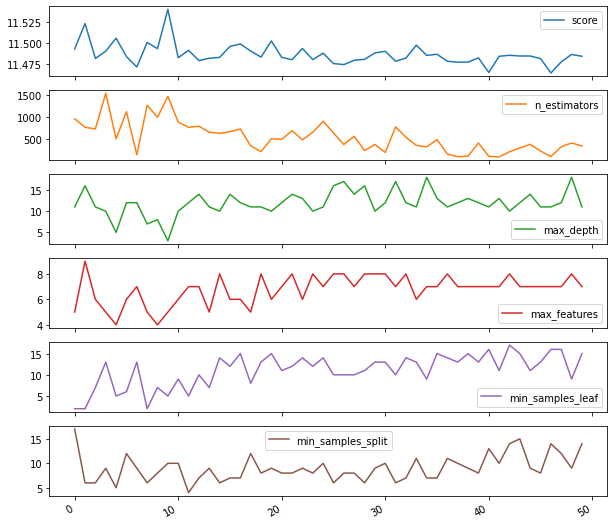

In [ ]:
sa_results=np.array([[x['result']['loss'],
                      x['misc']['vals']['n_estimators'][0],
                      x['misc']['vals']['max_depth'][0],
                      x['misc']['vals']['max_features'][0],
                      x['misc']['vals']['min_samples_leaf'][0],
                      x['misc']['vals']['min_samples_split'][0],] for x in trials.trials])

sa_results_df=pd.DataFrame(sa_results, columns=['score', 'n_estimators', 
                                                'max_depth', 'max_features',
                                                'min_samples_leaf','min_samples_split'
                                                ])
sa_results_df.plot(subplots=True,figsize=(10, 10))

In [ ]:
def gb_mse_cv(params, random_state=random_state, cv=kf, X=X_train, y=y_train):
    # the function gets a set of variable parameters in "param"
    params = {'alpha': params['alpha'], 
              'l1_ratio': params['l1_ratio'],
             'tol': params['tol'],
             'max_iter': int(params['max_iter']),
              }
              
    model = make_pipeline(RobustScaler(), ElasticNet(
        random_state=random_state, **params))
    score = np.sqrt(-cross_val_score(model, X, y, cv=cv, scoring="neg_mean_squared_error", n_jobs=-1).mean())
    return score

# possible values of parameters
space={'alpha': hp.uniform('alpha', 0.1, 1.0),
       'l1_ratio' : hp.uniform('l1_ratio', 0.1, 1.0),
       'tol' : hp.uniform('tol', 0.0001, 0.001),
       'max_iter' : hp.quniform('max_iter', 1000, 40000, 1000),
      }

# trials will contain logging information
trials1 = Trials()

best=fmin(fn=gb_mse_cv, # function to optimize
          space=space, 
          algo=anneal.suggest, # optimization algorithm, hyperotp will select its parameters automatically
          max_evals=50, # maximum number of iterations
          trials=trials1, # logging
          rstate=np.random.RandomState(random_state) # fixing random state for the reproducibility
         )

# computing the score on the test set
model = make_pipeline(RobustScaler(), ElasticNet(random_state=random_state,
                      alpha=best['alpha'],l1_ratio=best['l1_ratio'],
                      tol=best['tol'],max_iter=int(best['max_iter'])))
model.fit(X_train,y_train)
sa_test_score1=mean_squared_error(X_test, model.predict(y_test))
print("Best MSE {:.3f} params {}".format( gb_mse_cv(best), best))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)


Best MSE 11.794 params {'alpha': 0.3287494747838685, 'l1_ratio': 0.15246381183857904, 'max_iter': 26000.0, 'tol': 0.000673943106484806}


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fed9690b7f0>,
      dtype=object)

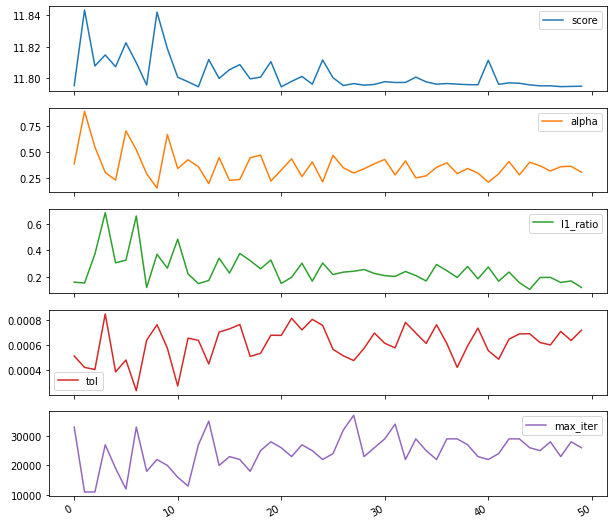

In [ ]:
sa_results1=np.array([[x['result']['loss'],
                      x['misc']['vals']['alpha'][0],
                      x['misc']['vals']['l1_ratio'][0],
                      x['misc']['vals']['tol'][0],
                      x['misc']['vals']['max_iter'][0]] for x in trials1.trials])

sa_results_df1=pd.DataFrame(sa_results1, columns=['score', 'alpha', 
                                                'l1_ratio', 'tol',
                                                'max_iter'])
sa_results_df1.plot(subplots=True,figsize=(10, 10))

In [ ]:
def gb_mse_cv(params, random_state=random_state, cv=kf, X=X_train, y=y_train):
    # the function gets a set of variable parameters in "param"
    params = {'alpha': params['alpha'], 
             'tol': params['tol'],
             'max_iter': int(params['max_iter'])
              }
              
    model = make_pipeline(RobustScaler(), Lasso(
        random_state=random_state, **params))
    score = np.sqrt(-cross_val_score(model, X, y, cv=cv, scoring="neg_mean_squared_error", n_jobs=-1).mean())
    return score

# possible values of parameters
space={'alpha': hp.uniform('alpha', 0.1, 1.0),
       'tol' : hp.uniform('tol', 0.0001, 0.001),
       'max_iter' : hp.quniform('max_iter', 1000, 40000, 1000)
      }

# trials will contain logging information
trials2 = Trials()

best=fmin(fn=gb_mse_cv, # function to optimize
          space=space, 
          algo=anneal.suggest, # optimization algorithm, hyperotp will select its parameters automatically
          max_evals=50, # maximum number of iterations
          trials=trials2, # logging
          rstate=np.random.RandomState(random_state) # fixing random state for the reproducibility
         )

# computing the score on the test set
model = make_pipeline(RobustScaler(), Lasso(random_state=random_state,
                      alpha=best['alpha'], tol=best['tol'],max_iter=int(best['max_iter'])))
model.fit(X_train,y_train)
sa_test_score2=mean_squared_error(X_test, model.predict(y_test))
print("Best MSE {:.3f} params {}".format( gb_mse_cv(best), best))

100%|██████████| 50/50 [25:43<00:00, 30.88s/it, best loss: 11.837457138016847]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)


Best MSE 11.837 params {'alpha': 0.5760573579771326, 'max_iter': 16000.0, 'tol': 0.000427719327612117}


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fed8a3ca898>,
      dtype=object)

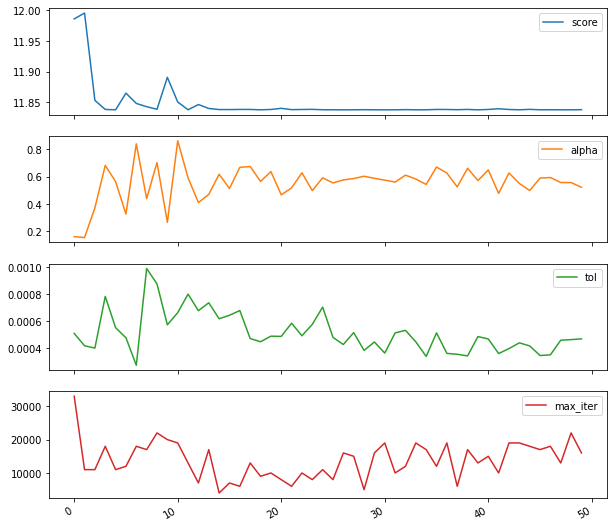

In [ ]:
sa_results2=np.array([[x['result']['loss'],
                      x['misc']['vals']['alpha'][0],
                      x['misc']['vals']['tol'][0],
                      x['misc']['vals']['max_iter'][0]] for x in trials2.trials])

sa_results_df2=pd.DataFrame(sa_results2, columns=['score', 'alpha', 
                                                'tol','max_iter'])
sa_results_df2.plot(subplots=True,figsize=(10, 10))

In [ ]:
print(np.sqrt(sa_test_score))
print(np.sqrt(sa_test_score1))
print(np.sqrt(sa_test_score2))

11.612803200346809
12.003357177580595
12.046499174607225


In [ ]:
lasso = Lasso(alpha=0.576, max_iter=16000, tol=0.000428, random_state=42)
scoore = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(scoore.mean(), scoore.std()))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coo


Lasso score: 11.6660 (2.1319)



In [ ]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.576, max_iter=16000, tol=0.000428, random_state=42))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.3285, l1_ratio= 0.1525, max_iter=26000, tol=0.000674, random_state=42))
RF = RandomForestRegressor(n_estimators=109, min_samples_leaf=16, min_samples_split=14,
                           max_depth=11, max_features=7, verbose=True, n_jobs=-1)


In [ ]:
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_data)
    rmse= np.sqrt(-cross_val_score(model, train_data, train_label, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)


In [ ]:
from sklearn.ensemble import VotingRegressor, StackingRegressor

lasso = Lasso(alpha=0.576, max_iter=16000, tol=0.000428, random_state=42)
ENet = ElasticNet(alpha=0.3285, l1_ratio= 0.1525, max_iter=26000, tol=0.000674, 
                  random_state=42)
RF = RandomForestRegressor(n_estimators=109, min_samples_leaf=16, min_samples_split=14,
                           max_depth=11, max_features=7, verbose=True, n_jobs=-1)
models = [
    ('lasso', lasso), 
    ('enet', ENet),
    ('rf',RF)
]

#vc = VotingRegressor(models, weights=[2,2,4],n_jobs=-1)
sr = StackingRegressor(estimators = [('lasso', lasso),('enet', ENet),('rf',RF)], final_estimator = RF, cv = 5)
sr.fit(train_data, train_label)

rf_preds = []
for estimator in sr.estimators_:
    rf_preds.append(estimator.predict(test))
rf_preds = np.array(rf_preds)

for i, q in enumerate(np.arange(0.1, 1, 0.1)):
    y_pred = np.percentile(rf_preds, q * 100, axis=0)
    submission.iloc[:, i] = np.ravel(y_pred)


In [ ]:
from mlxtend.regressor import StackingRegressor

# 예측모형 아키텍처
## 첫번째 계층 회귀모형

# 스태킹 예측모형
reg_stack = StackingRegressor(
    regressors=[lasso, ENet, RF],
    meta_regressor=RF,
    use_features_in_secondary=True)
reg_stack.fit(train_data, train_label)

# 성능
stack_pred = reg_stack.predict(test)

for estimator in vc.estimators_:
    rf_preds.append(estimator.predict(test))
rf_preds = np.array(rf_preds)


In [ ]:
from sklearn import ensemble
rf = ensemble.RandomForestRegressor(n_estimators=109, min_samples_leaf=16, min_samples_split=14,
                           max_depth=11, max_features=7, verbose=True, n_jobs=-1)

rf.fit(train_data, train_label)

rf_preds = []
for estimator in rf.estimators_:
    rf_preds.append(estimator.predict(test))
rf_preds = np.array(rf_preds)

for i, q in enumerate(np.arange(0.1, 1, 0.1)):
    y_pred = np.percentile(rf_preds, q * 100, axis=0)
    submission.iloc[:, i] = np.ravel(y_pred)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 109 out of 109 | elapsed:    0.7s finished


In [ ]:
submission1[submission1 == submission]

,q_0.1,q_0.2,q_0.3,q_0.4,q_0.5,q_0.6,q_0.7,q_0.8,q_0.9
id,,,,,,,,,
0.csv_Day7_0h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.csv_Day7_0h30m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.csv_Day7_1h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.csv_Day7_1h30m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.csv_Day7_2h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
80.csv_Day8_21h30m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80.csv_Day8_22h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80.csv_Day8_22h30m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn import ensemble
et = ensemble.ExtraTreesRegressor(n_estimators=4000, max_features=9, min_samples_leaf=3, min_samples_split=4,
                                    verbose=True, max_depth = 18,
                                    n_jobs=-1)
et.fit(train_data, train_label)

et_preds = []
for estimator in et.estimators_:
    et_preds.append(estimator.predict(test))
et_preds = np.array(et_preds)

for i, q in enumerate(np.arange(0.1, 1, 0.1)):
    y_pred1 = np.percentile(et_preds, q * 100, axis=0)
    submission1.iloc[:, i] = np.ravel(y_pred1)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed:   25.1s finished


In [ ]:
submission1['q_0.2'].describe()

count    7776.000000
mean       15.036975
std        19.968827
min         0.000000
25%         0.000000
50%         0.000000
75%        30.622597
max        79.774719
Name: q_0.2, dtype: float64

In [ ]:
submission['q_0.2'].describe()

count    7776.000000
mean       15.036975
std        19.968827
min         0.000000
25%         0.000000
50%         0.000000
75%        30.622597
max        79.774719
Name: q_0.2, dtype: float64

In [ ]:
submission.to_csv(f'submission.csv',index=True)